Here I test the code for generating cylinders from the triangles.

In [1]:
from context import bowman
import triangulation as trin
import sage.all
from sage.all import *

Completed triangulation.


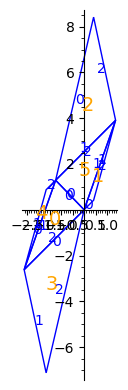

In [10]:
X = trin.Triangulation.ronen_l(44)
d = vector([1, 1])
Y = X.make_directional_triangulation(d)
#print(X.is_delaunay)
Y.plot()

Completed triangulation.
True


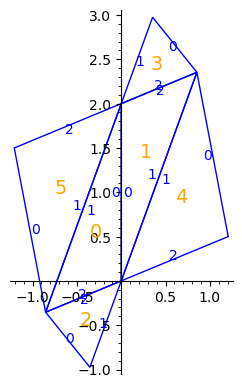

In [11]:
X = trin.Triangulation.regular_octagon()
k = QuadraticField(2)
sqrt2 = k.gen()
d = vector([0, 1])
d1=vector([1 / sqrt2, 1 / sqrt2])
d2 = vector([-1 -1 / sqrt2, -1 / sqrt2])
Y = X.make_directional_triangulation(d2)
print(X.is_delaunay)
Y.plot()

Completed triangulation.
True


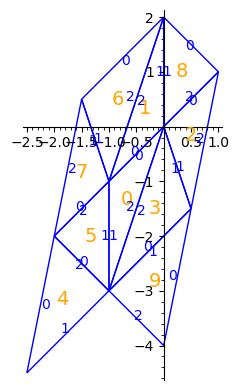

In [12]:
X = trin.Triangulation.mcmullen_l(2, 2)
d = vector([2, 2])
Y = X.make_directional_triangulation(d)
print(X.is_delaunay)
Y.plot()

Completed triangulation.
False


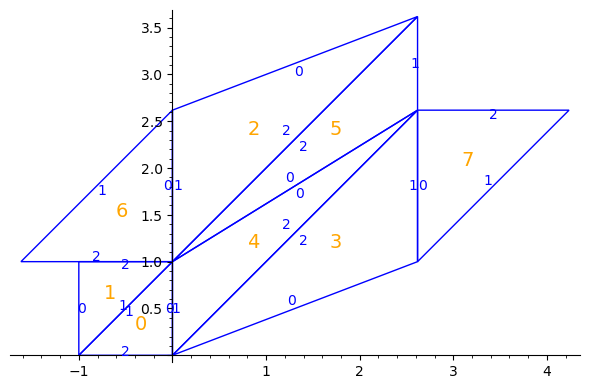

In [13]:
k = QuadraticField(5)
sqrt5 = k.gen()
phi = (1+sqrt5)/2
d = vector([1,1])
X = trin.Triangulation.mcmullen_s(phi)
Y = X.make_directional_triangulation(d)
print(Y.is_delaunay)
Y.plot()